# Creating QA pairs - Train / Eval

In [2]:
import pandas as pd
catastici = pd.read_csv(f'../../data/clean/catastici.csv')

In [3]:
def create_questions(data):
    questions = [
        f"what is the family name of {data['Owner_First_Name']} who owns {data['Property_Type']} in {data['Property_Location']}?",
        f"how much does {data['Owner_First_Name']} {data['Owner_Family_Name']} earn from their property {data['Property_Type']} in {data['Property_Location']}?",
        f"what type of property does {data['Owner_First_Name']} {data['Owner_Family_Name']} own in {data['Property_Location']}?",
        f"where is the property {data['Property_Type']} of {data['Owner_First_Name']} {data['Owner_Family_Name']} located?",
        f"who owns a property {data['Property_Type']} in {data['Property_Location']} with the family name of {data['Owner_Family_Name']}?"
    ]
    return questions

def create_answers(data):
    answers = [
        data['Owner_Family_Name'],
        data['Rent_Income'],
        data['Property_Type'],
        data['Property_Location'],
        data['Owner_First_Name']
    ]
    return answers

# create QA pairs
catastici['question'] = catastici.apply(lambda row: create_questions(row), axis=1)
catastici['answer'] = catastici.apply(lambda row: create_answers(row), axis=1)
data = catastici.explode(['question', 'answer']).reset_index(drop=True)

In [10]:
# save the data
data[['question','answer']].to_csv(f'../data/train_qa.csv', index=False)

I am creating both evaluation and test sets out of the train set, as we want the model to memorize the dataset, as I think it is more meaningful to test if the model has memorized the dataset on the part of the data that we have trained the model on.

# Test

In [23]:
import pandas as pd
import numpy as np
data = pd.read_csv('../data/train_qa.csv')

In [16]:
# get the length of answer
data['answer_len'] = data.apply(lambda row: len(row['answer'].split()), axis=1)
data['char_len'] = data.apply(lambda row: len(row['answer']), axis=1)

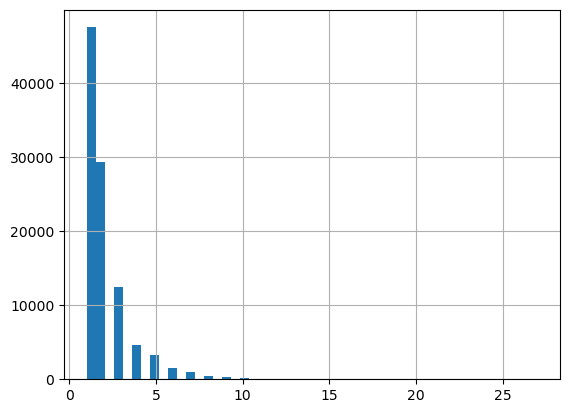

In [19]:
data['answer_len'].hist(bins=50);

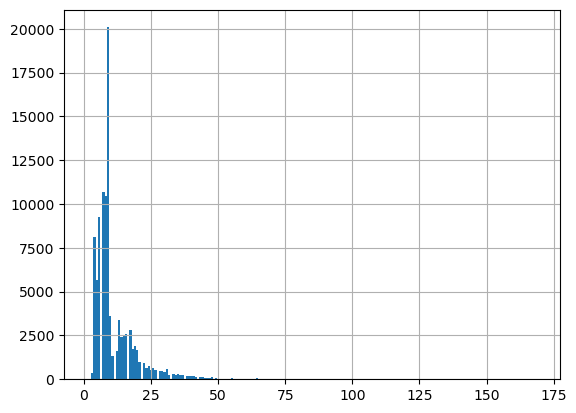

In [21]:
data['char_len'].hist(bins=200);

I am sampling a test data with the answer of less than 4 words and less than 20 characters for the sake of simplifying the testing. So, that we can do exact matching with better precision. Also, this way it is easier to go through the test set manually if needed.

In [24]:
seed = 42
np.random.seed(seed)
data_sample = data[(data['answer_len'] < 4) & (data['char_len'] < 20)].sample(10000)
data_sample = data_sample[['question','answer']].reset_index(drop=True)
data_sample.to_csv(f'../data/test_qa.csv', index=False)